In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pumping_data = pd.read_csv("acid_stuck_pipe.csv", index_col=[0], parse_dates=["Time"])

In [3]:
pumping_data.head()

,Pressure,Rate,T_BBLS
Time,,,
2023-05-07 01:21:26,45,0.0,11.78
2023-05-07 01:21:28,45,0.0,11.78
2023-05-07 01:21:30,45,0.0,11.78
2023-05-07 01:21:32,45,0.0,11.78
2023-05-07 01:21:34,45,0.0,11.78


In [4]:
pumping_data.describe()

,Pressure,Rate,T_BBLS
count,1764.000000,1764.000000,1764.000000
mean,1081.323129,2.241746,30.365017
std,682.319152,1.277366,31.692500
min,45.000000,0.000000,0.000000
25%,762.000000,1.957500,1.815000
50%,1068.500000,2.670000,16.945000
75%,1304.000000,3.192500,55.437500
max,2995.000000,4.500000,99.540000


<Axes: xlabel='Time'>

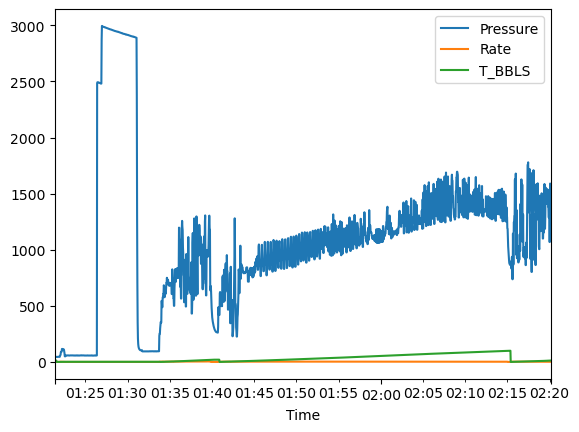

In [5]:
pumping_data.plot()

In [6]:
pumping_data_1["Rate"].plot(kind="kde")

NameError: name 'pumping_data_1' is not defined

In [7]:
pumping_data_1 = pumping_data["2023-05-02 01:33:46":]

In [8]:
pumping_data_1.tail(20)

,Pressure,Rate,T_BBLS
Time,,,
2023-05-07 02:19:34,1542,2.67,10.10
2023-05-07 02:19:36,1523,2.67,10.22
2023-05-07 02:19:38,1501,2.74,10.33
2023-05-07 02:19:40,1408,2.88,10.45
2023-05-07 02:19:42,1408,2.89,10.57
2023-05-07 02:19:44,1540,2.88,10.70
2023-05-07 02:19:46,1530,2.88,10.82
2023-05-07 02:19:48,1530,2.74,10.94
2023-05-07 02:19:50,1385,2.39,11.05


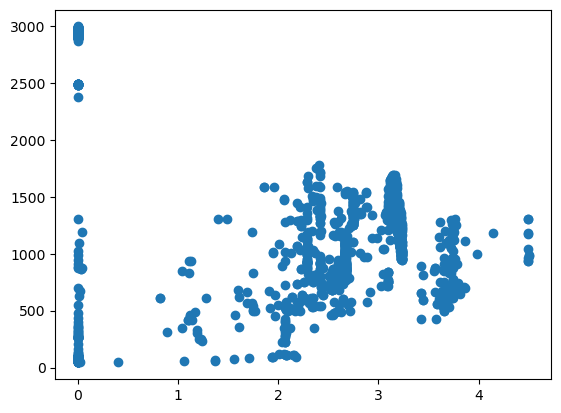

In [9]:
plt.scatter(pumping_data_1["Rate"], pumping_data_1["Pressure"])

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn import model_selection, linear_model

In [11]:
# Instantiate the model
modelLR = LinearRegression()

In [12]:
## Select test and train data
X = pumping_data_1.iloc[:,0:1]

In [13]:



y = pumping_data_1.iloc[:, 1:2]

In [14]:
Xtest, Xtrain, ytest, ytrain = model_selection.train_test_split(
    X, y, test_size=0.3, random_state = 2)

In [15]:
## Train and fit the model
modelLR.fit(Xtrain, ytrain)

LinearRegression()

In [16]:
modelLR.score(Xtest, ytest)

-0.008161668503878117

In [17]:



from sklearn.metrics import mean_squared_error

In [18]:
y_pred = modelLR.predict(Xtest)


In [19]:
print(mean_squared_error(y_pred, ytest))

1.627007679516234


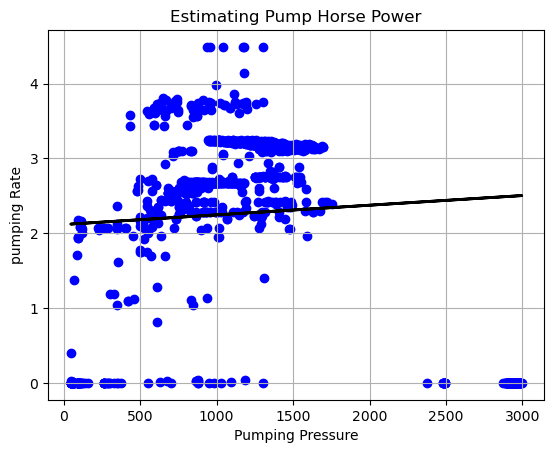

In [20]:
plt.scatter(Xtest, ytest, c="blue")
plt.plot(Xtest, y_pred, c="black", linewidth=2)
plt.xlabel("Pumping Pressure")
plt.ylabel("pumping Rate")
plt.title("Estimating Pump Horse Power")
plt.grid()
plt.show()

In [21]:
modelLR.coef_

array([[0.00012901]])

In [22]:
modelLR.intercept_

array([2.11681379])

In [23]:
def get_hhp(Xtest, ypred):
    hhp =(Xtest * ytest)/40.8
    return hhp

In [24]:
get_hhp(1800, 2)

,Rate
Time,
2023-05-07 02:13:08,121.323529
2023-05-07 01:47:46,117.794118
2023-05-07 02:12:38,121.764706
2023-05-07 02:06:22,140.294118
2023-05-07 01:29:16,0.000000
...,...
2023-05-07 02:13:22,121.323529
2023-05-07 02:15:02,1.764706
2023-05-07 01:37:52,160.147059
